
# Data management

## Visualization exercise
## [Malka Guillot](https://malkaguillot.github.io/)

## HEC Liège | [ECON2306](https://malkaguillot.github.io/ECON2206-Data-Management/)

Credit: [Jana Lasser](https://janalasser.at/)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# colors
demblue = "#0015BC"
repred = "#FF0000"
demgrey = "#9EA4BF"
repgrey = "#BF9EA2"

In [3]:
sns.set_theme(style='whitegrid')

In [4]:
# read the data frame with information about individual Congress Members
users = pd.read_csv("https://raw.githubusercontent.com/JanaLasser/SICSS-aachen-graz/main/04_01_visualization/exercise/data/users.csv", dtype={"author_id":str})

In [5]:
users.head()

,handle,author_id,name,party,N_tweets,followers_count,following_count,tweet_count,created_at,congress,NG_score_mean,belief_share,truth_share,belief_share_2010_to_2013,truth_share_2010_to_2013,belief_share_2019_to_2022,truth_share_2019_to_2022,ideology_mean,followers_count_log,following_count_log
0,RepLipinski,1009269193,Former Rep. Daniel Lipinski,Democrat,3179,19893.0,2478.0,4359.0,2012-12-13 17:03:06+00:00,116.0,93.193439,0.050677,0.188008,NaN,NaN,0.053934,0.214467,0.471657,9.898123,7.815207
1,CaptClayHiggins,1011053278304592000,Clay Higgins,Republican,21,3289.0,156.0,24.0,2018-06-25 01:07:40+00:00,116.0,NaN,0.000000,0.230769,NaN,NaN,0.000000,0.181818,0.282969,8.098339,5.049856
2,SenBillCassidy,1017500185356852992,"U.S. Senator Bill Cassidy, M.D.",Republican,3691,49027.0,1420.0,5979.0,2018-07-12 20:05:23+00:00,116.0,90.480231,0.087148,0.175027,NaN,NaN,0.087148,0.175027,0.797008,10.800126,7.258412
3,RepWexton,1017819745880542976,Rep. Jennifer Wexton,Democrat,3488,33067.0,1344.0,4572.0,2018-07-13 17:15:12+00:00,117.0,93.317400,0.067063,0.211761,NaN,NaN,0.067063,0.211761,0.280801,10.406291,7.203406
4,AugustPfluger,1021216905795899008,August Pfluger,Republican,1912,5198.0,216.0,2061.0,2018-07-23 02:14:18+00:00,117.0,85.296453,0.056452,0.156682,NaN,NaN,0.056452,0.156682,NaN,8.556029,5.375278


## 1. Histogram

<div class="alert alert-info">
<h3> Task 1.1: Plot the distribution of the share of belief-speaking by party and period </h3>
    
Use the `histplot` function of the package `seaborn` to visualize how the share of belief-speaking changed for democrats between the time period 2010-2013 and 2019-2022. How did it change for republicans?
</div>

**Hint:** You can use the argument `hue` of the `histplot` function to create a separate histogram for each time period in the same plot. See also the function's [documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html).


In [6]:
# histplot() requires "long-form" data, we therefore reshape the data frame
# to match the required input
belief = pd.melt(
    users, 
    id_vars=["handle", "author_id", "party"],
    value_vars=["belief_share_2010_to_2013", "belief_share_2019_to_2022"],
    var_name="time_period",
    value_name="share"
)
belief.tail()

,handle,author_id,party,time_period,share
2049,jeffsessions,986781648,Republican,belief_share_2019_to_2022,0.132004
2050,JahanaHayesCT,991721030631780352,Democrat,belief_share_2019_to_2022,0.141907
2051,RodneyDavis,993153006,Republican,belief_share_2019_to_2022,0.057344
2052,RepDelBene,995193054,Democrat,belief_share_2019_to_2022,0.052866
2053,RepDLesko,996094929733652480,Republican,belief_share_2019_to_2022,0.049877


In [7]:
# rename the values in the newly created "time_period" column to contain only
# the required information
belief["time_period"] = belief["time_period"].replace({
    "belief_share_2010_to_2013":"2010 to 2013",
    "belief_share_2019_to_2022":"2019 to 2022"
})

belief.tail(3)

,handle,author_id,party,time_period,share
2051,RodneyDavis,993153006,Republican,2019 to 2022,0.057344
2052,RepDelBene,995193054,Democrat,2019 to 2022,0.052866
2053,RepDLesko,996094929733652480,Republican,2019 to 2022,0.049877


#### Solution 1: two graphs

Text(0.5, 1.0, '2010 to 2013')

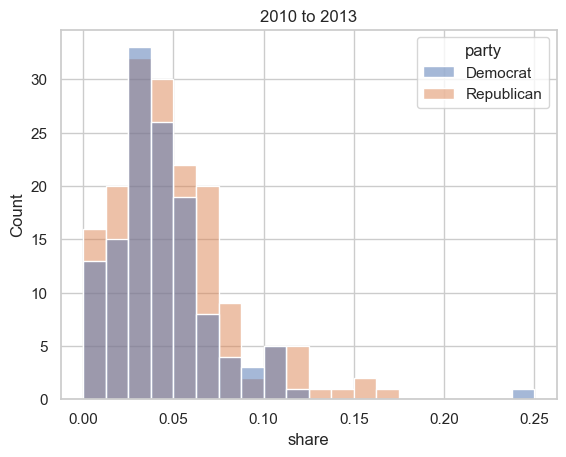

In [8]:
sns.histplot(data=belief[belief['time_period']=='2010 to 2013'], x='share', bins=20, hue='party')
plt.title("2010 to 2013")

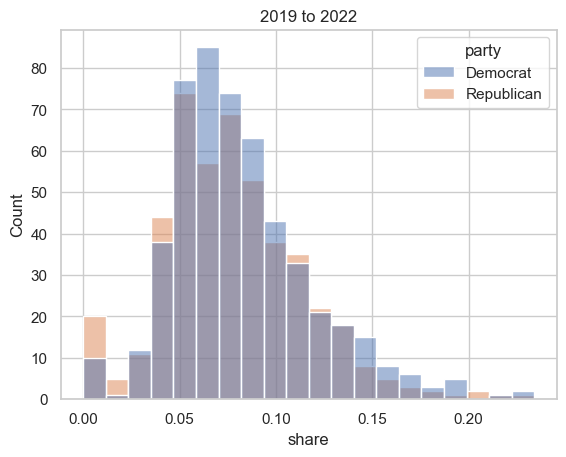

In [9]:
sns.histplot(data=belief[belief['time_period']=='2019 to 2022'], x='share', bins=20, hue='party')
plt.title("2019 to 2022")
plt.show()

<Axes: xlabel='share', ylabel='Count'>

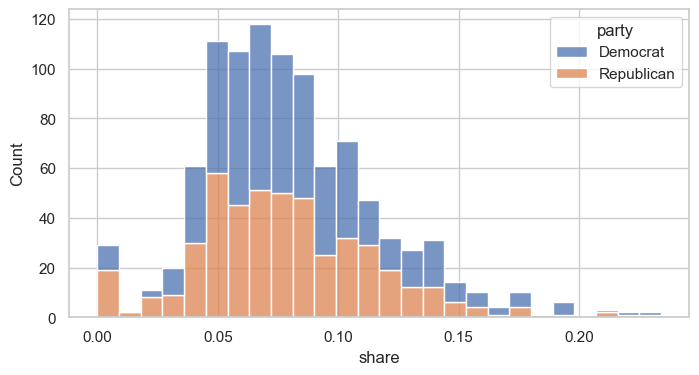

In [10]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(
    # Your code here
    belief[belief["time_period"]=="2019 to 2022"], # data
    x="share", # variable 
    hue="party", # color
    multiple="stack", # stacking the bars
    ax=ax
)

#### Solution 2: two `axes`

(0.0, 70.0)

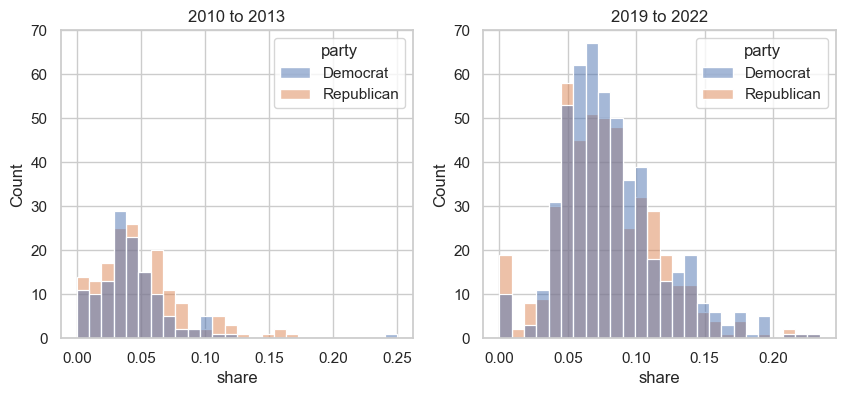

In [11]:
fig, ax = plt.subplots(1, 2,figsize=(10, 4))
sns.histplot(
    # Your code here
    belief[belief["time_period"]=="2010 to 2013"], # data
    x="share", # variable 
    hue="party", # color
    ax=ax[0]
)
sns.histplot(
    # Your code here
    belief[belief["time_period"]=="2019 to 2022"], # data
    x="share", # variable 
    hue="party", # color
    ax=ax[1]
)
ax[0].set_title('2010 to 2013')
ax[1].set_title('2019 to 2022')
ax[0].set_ylim(0,70)
ax[1].set_ylim(0,70)

(1.0, 120.0)

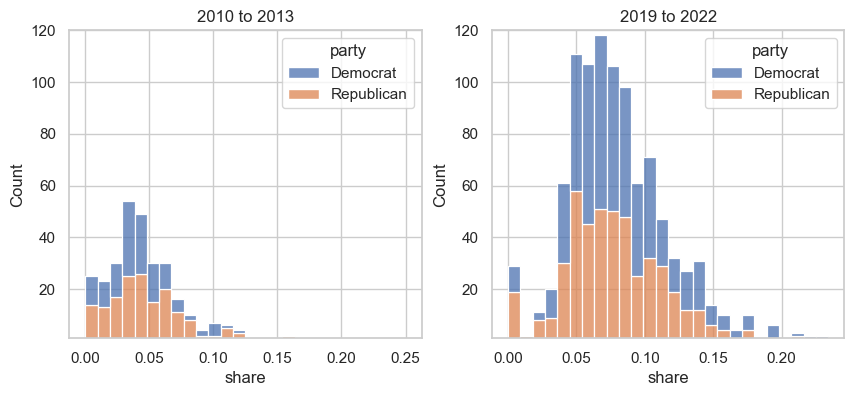

In [12]:
fig, ax = plt.subplots(1, 2,figsize=(10, 4))
sns.histplot(
    # Your code here
    belief[belief["time_period"]=="2010 to 2013"], # data
    x="share", # variable 
    hue="party", # color
    multiple="stack", # stacking the bars
    ax=ax[0]
)
sns.histplot(
    # Your code here
    belief[belief["time_period"]=="2019 to 2022"], # data
    x="share", # variable 
    hue="party", # color
    multiple="stack", # stacking the bars
    ax=ax[1]
)
ax[0].set_title("2010 to 2013")
ax[1].set_title("2019 to 2022")
ax[0].set_ylim(1,120)
ax[1].set_ylim(1,120)


#### Solution 3: using `FacetGrid`

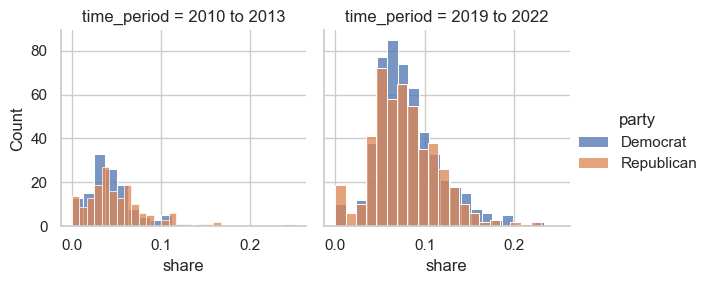

In [13]:
g = sns.FacetGrid(belief, col='time_period', hue='party')
g.map(sns.histplot, "share", bins=20,     
  )
g.add_legend()
plt.show()

<div class="alert alert-info">
<h3> Task 1.2 (optional): Plot the distribution of the share of belief-speaking by party and period </h3>
    
Instead of the `histplot` function use the `kdeplot` function to visualize the distributions. When does it make sense to use a KDE plot instead of a histogram?

</div>


Text(0.5, 1.0, 'Density plot of belief shares in 2019 to 2022')

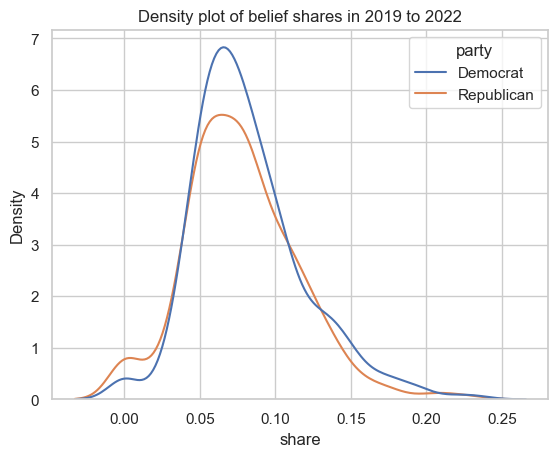

In [14]:
fig, ax = plt.subplots()
sns.kdeplot(
    # your code here
    belief[belief["time_period"]=="2019 to 2022"], # data
    x="share", # variable 
    hue="party", # color
    ax=ax
)
plt.title("Density plot of belief shares in 2019 to 2022")

<div class="alert alert-info">
<h3> Task 1.3:  </h3>
    
Create a 2x2 grid to show how the proportion of belief-speaking and truth-seeking tweets changed for republicans and democrats between 2010-2013 and 2019-2022.
</div>

<Axes: xlabel='truth_share_2019_to_2022', ylabel='Density'>

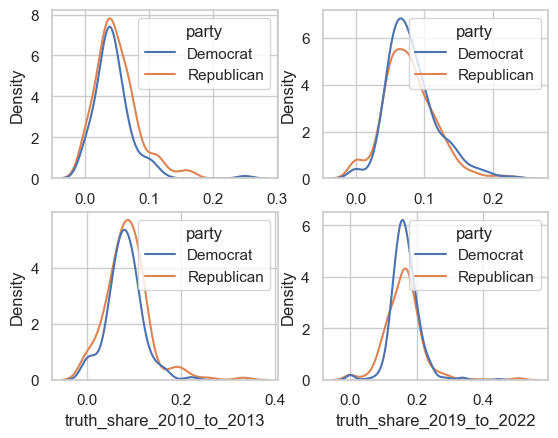

In [15]:
fig, axes = plt.subplots(2, 2)
sns.kdeplot(
    # your code here
    users, # data
    x="belief_share_2010_to_2013", # variable 
    hue="party", # color
    ax=axes[0, 0]
)
sns.kdeplot(
    # your code here
    users, # data
    x="truth_share_2010_to_2013", # variable 
    hue="party", # color
    ax=axes[1, 0]
)
sns.kdeplot(
    # your code here
    users, # data
    x="belief_share_2019_to_2022", # variable 
    hue="party", # color
    ax=axes[0, 1]
)
sns.kdeplot(
    # your code here
    users, # data
    x="truth_share_2019_to_2022", # variable 
    hue="party", # color
    ax=axes[1, 1]
)

## 2. Bar chart

In [16]:
topics = pd.read_csv("https://raw.githubusercontent.com/JanaLasser/SICSS-aachen-graz/main/04_01_visualization/exercise/data/topics.csv")
topics["topic"] = topics["topic_name"].str.extract(r"(\w+)") # extract the first word of the topic name

topics.head(10)

,component,party,proportion,topic_name,topic
0,belief-speaking,Democrat,0.071420,abortion $\vert$ woman $\vert$ right $\vert$ life,abortion
1,truth-seeking,Democrat,0.099941,abortion $\vert$ woman $\vert$ right $\vert$ life,abortion
2,belief-speaking,Republican,0.094262,abortion $\vert$ woman $\vert$ right $\vert$ life,abortion
3,truth-seeking,Republican,0.111906,abortion $\vert$ woman $\vert$ right $\vert$ life,abortion
4,belief-speaking,Democrat,0.054801,gun $\vert$ violence $\vert$ background $\vert...,gun
5,truth-seeking,Democrat,0.108535,gun $\vert$ violence $\vert$ background $\vert...,gun
6,belief-speaking,Republican,0.089088,gun $\vert$ violence $\vert$ background $\vert...,gun
7,truth-seeking,Republican,0.140884,gun $\vert$ violence $\vert$ background $\vert...,gun
8,belief-speaking,Democrat,0.069394,vaccine $\vert$ vaccinate $\vert$ mandate $\ve...,vaccine
9,truth-seeking,Democrat,0.252456,vaccine $\vert$ vaccinate $\vert$ mandate $\ve...,vaccine


In [17]:
belief_speaking = topics[topics["component"] == "belief-speaking"][0:8].copy()
belief_speaking["proportion"] = belief_speaking["proportion"] * 100
truth_seeking = topics[topics["component"] == "truth-seeking"][0:8].copy()
truth_seeking["proportion"] = truth_seeking["proportion"] * 100

<div class="alert alert-info">
<h3> Task 2.1: visualize the share of belief-speaking and truth-seeking tweets by topic </h3>
    
The data frame `topics` contains information about the proportion of belief-speaking and truth-seeking that Democrats and Republicans use when discussing different topics. 

Use the `barplot` function of the package `seaborn` to visualize the share of both honesty components for the topics "abortion", "gun", "vaccine" and "putin", differentiaded by party. 

For which topics do the Republicans use more belief-speaking? For which the Democrats?
</div>


Text(0.5, 1.0, 'Truth seeking')

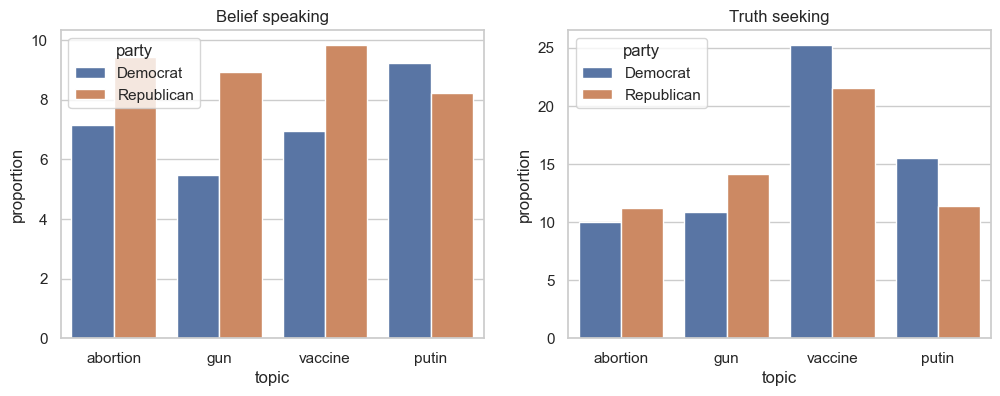

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(
   data = belief_speaking, 
    x = 'topic',
    y = 'proportion',
    hue= 'party', 
    ax=axs[0]
)
axs[0].set_title('Belief speaking')

sns.barplot(
   data = truth_seeking, 
    x = 'topic',
    y = 'proportion',
    hue= 'party', 
    ax=axs[1]
)
axs[1].set_title('Truth seeking')


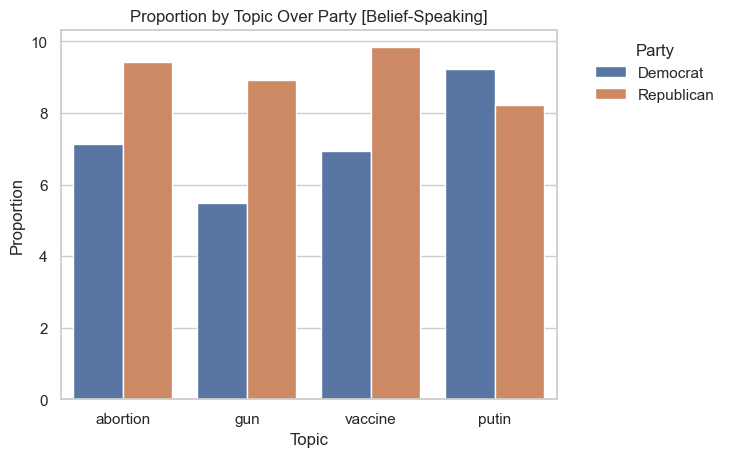

In [19]:
fig, ax = plt.subplots()
sns.barplot(
    data=belief_speaking,
    x="topic",
    y="proportion", 
    hue='party',
    ax=ax
)
plt.xlabel('Topic')
plt.ylabel('Proportion')
plt.title('Proportion by Topic Over Party [Belief-Speaking]')
plt.legend(title='Party',frameon = False, bbox_to_anchor=(1.05, 1), loc='upper left') # Place the legend outside the plot

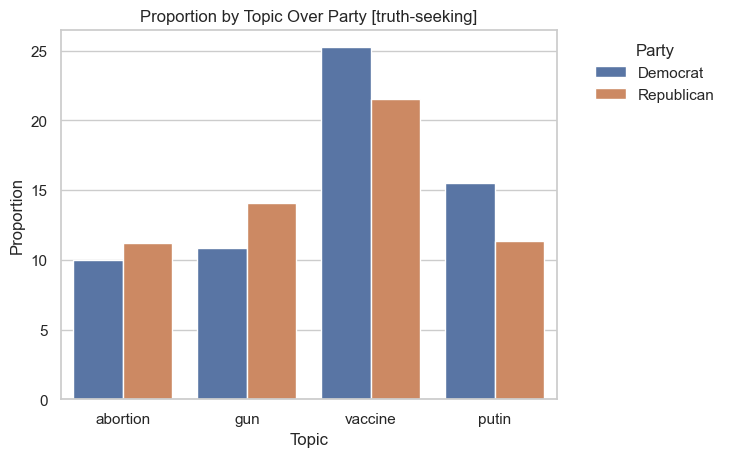

In [20]:
fig, ax = plt.subplots()
sns.barplot(
    data=truth_seeking,
    x="topic",
    y="proportion", 
    hue='party',
    ax=ax
)
ax.set_xlabel('Topic')
plt.ylabel('Proportion')
plt.title('Proportion by Topic Over Party [truth-seeking]')
plt.legend(title='Party', frameon = False, bbox_to_anchor=(1.05, 1), loc='upper left') # Place the legend outside the plot


<div class="alert alert-info">
<h3> Task 2.1: visualize the share of belief-speaking and truth-seeking tweets by topic </h3>
    
Create two bar plots next to each other, one for belief-speaking and one for truth-seeking, this time showing all 20 topics contained in the `topics` data frame. 

Which topics have the highest difference in belief-speaking and truth-seeking between the parties?
</div>

In [21]:
# your code here

## 3. Time series

<div class="alert alert-info">
<h3> Task 3.1 </h3>
    
The files `belief.csv` and `truth.csv` contain the mean proportion of belief-speaking and truth-seeking tweets for every month since 2022-01-01, split by Democrats and Republicans. Create a figure with two vertically stacked panels. Plot the time-series of belief-speaking split by party in the first panel, and the time-series of truth-seeking in the panel below. Apply a rolling average of three months to the data to smooth the time-series. 
</div>

In [22]:
belief = pd.read_csv("https://raw.githubusercontent.com/JanaLasser/SICSS-aachen-graz/main/04_01_visualization/exercise/data/belief.csv", parse_dates=["date"])
belief = belief[belief['party'].isin(['Republican', 'Democrat'])]

truth = pd.read_csv("https://raw.githubusercontent.com/JanaLasser/SICSS-aachen-graz/main/04_01_visualization/exercise/data/truth.csv", parse_dates=["date"])
truth = truth[truth['party'].isin(['Republican', 'Democrat'])]
belief.head(2)

,party,mean,perc_2.5,perc_97.5,date
0,Democrat,0.066411,0.036199,0.097674,2011-01-01
1,Republican,0.062301,0.041096,0.080412,2011-01-01


<Axes: xlabel='date', ylabel='mean'>

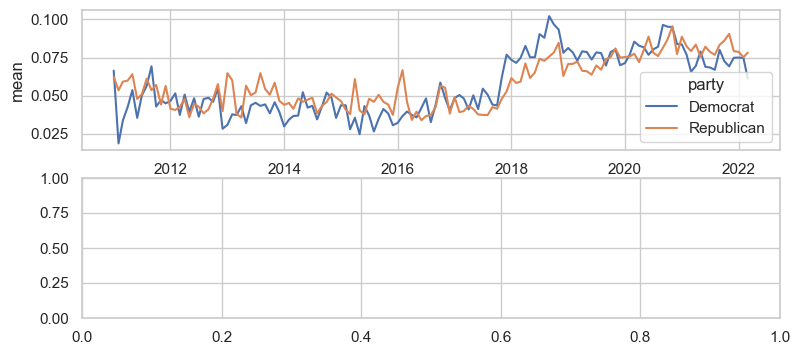

In [23]:
figx, axes = plt.subplots(2, 1, figsize=(9, 4))

sns.lineplot(
    data=belief,
    x="date",
    y="mean",
    hue="party",
    ax=axes[0]
)

<Axes: xlabel='date', ylabel='mean'>

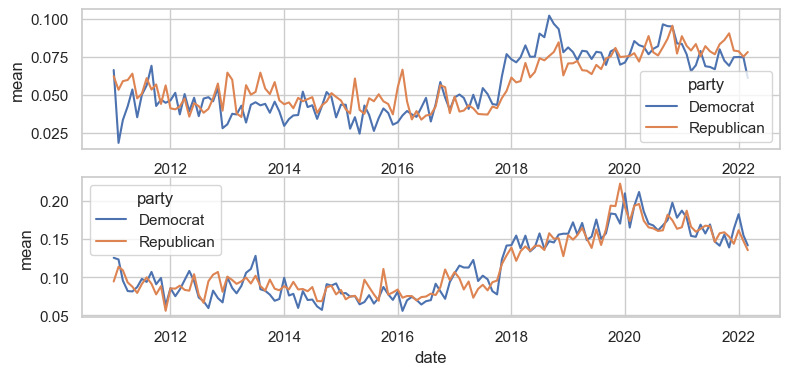

In [24]:
figx, axes = plt.subplots(2, 1, figsize=(9, 4))

sns.lineplot(
    data=belief,
    x="date",
    y="mean",
    hue="party",
    ax=axes[0]
)

sns.lineplot(
# your code here
    data=truth,
    x="date",
    y="mean",
    hue="party",
    ax=axes[1]
)


<div class="alert alert-info">
<h3> Task 3.2: add some confidence intervals </h3>
    
The data frames also contain the 95% confidence intervals of the time-series generated through bootstrapping (columns `perc_2.5` and `perc_97.5`). Plot a shaded area indicating the confidence interval around the mean value.  
</div>


**Hint:** You can use matplotlib's `fill_between()` function to plot a shaded area between two lines. You can modify the transparency of the area using the `alpha` function argument (see also the function's [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html)).

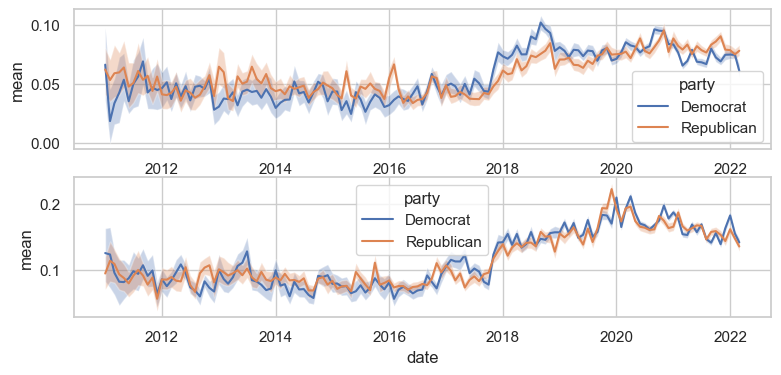

In [25]:
figx, axes = plt.subplots(2, 1, figsize=(9, 4))

sns.lineplot(
    data=belief,
    x="date",
    y="mean",
    hue="party",
    ax=axes[0]
)
for party in belief['party'].unique():
    party_data = belief[belief['party'] == party]
    axes[0].fill_between(
        party_data['date'],
        party_data['perc_2.5'],
        party_data['perc_97.5'],
        alpha=0.3,  # Adjust transparency of the shading
        label=f'{party} CI',
    )

sns.lineplot(
# your code here
    data=truth,
    x="date",
    y="mean",
    hue="party",
    ax=axes[1]
)

for party in truth['party'].unique():
    party_data = truth[truth['party'] == party]
    axes[1].fill_between(
        party_data['date'],
        party_data['perc_2.5'],
        party_data['perc_97.5'],
        alpha=0.3,  # Adjust transparency of the shading
        label=f'{party} CI',
    )

<div class="alert alert-info">
<h3> Task 3.3: add the dates of the presidential elections </h3>
    
Indicate the dates of the presidential elections in 2016 and 2020 in the plot. What can you say about the trend of belief-speaking and truth-seeking after the presidential elections?
</div>


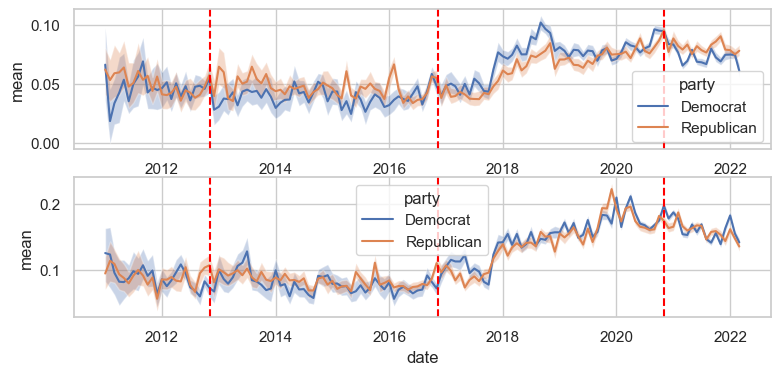

In [26]:
figx, axes = plt.subplots(2, 1, figsize=(9, 4))
sns.lineplot(
    data=belief,
    x="date",
    y="mean",
    hue="party",
    ax=axes[0]
)
for party in belief['party'].unique():
    party_data = belief[belief['party'] == party]
    axes[0].fill_between(
        party_data['date'],
        party_data['perc_2.5'],
        party_data['perc_97.5'],
        alpha=0.3,  # Adjust transparency of the shading
        label=f'{party} CI',
    )

sns.lineplot(
# your code here
    data=truth,
    x="date",
    y="mean",
    hue="party",
    ax=axes[1]
)

for party in truth['party'].unique():
    party_data = truth[truth['party'] == party]
    axes[1].fill_between(
        party_data['date'],
        party_data['perc_2.5'],
        party_data['perc_97.5'],
        alpha=0.3,  # Adjust transparency of the shading
        label=f'{party} CI',
    )
for date in ['2020-11-03', '2016-11-08', '2012-11-06']:
    axes[0].axvline(pd.to_datetime(date), color='red', linestyle='--', label='Election')   
    axes[1].axvline(pd.to_datetime(date), color='red', linestyle='--', label='Election')
plt.show()

## 4. Scatter plot

**Task 4.1:** The `users.csv` dataset contains information about the average [NewsGuard](https://www.newsguardtech.com/) score of links posted by each Congress Member (column `NG_score_mean`). Use `seaborn`'s `scatterplot()` function to find out if the share of belief-speaking over the whole observation period (column `belief_share`) is correlated to the average NewsGuard score.

In [27]:
users = pd.read_csv(
    "https://raw.githubusercontent.com/JanaLasser/SICSS-aachen-graz/main/04_01_visualization/exercise/data/users.csv", 
    dtype={"author_id":str},
    parse_dates=["created_at"]
)
users = users[users["party"].isin(["Democrat", "Republican"])]
users["belief_share"] = users["belief_share"] * 100
users.head(2)

,handle,author_id,name,party,N_tweets,followers_count,following_count,tweet_count,created_at,congress,NG_score_mean,belief_share,truth_share,belief_share_2010_to_2013,truth_share_2010_to_2013,belief_share_2019_to_2022,truth_share_2019_to_2022,ideology_mean,followers_count_log,following_count_log
0,RepLipinski,1009269193,Former Rep. Daniel Lipinski,Democrat,3179,19893.0,2478.0,4359.0,2012-12-13 17:03:06+00:00,116.0,93.193439,5.067698,0.188008,NaN,NaN,0.053934,0.214467,0.471657,9.898123,7.815207
1,CaptClayHiggins,1011053278304592000,Clay Higgins,Republican,21,3289.0,156.0,24.0,2018-06-25 01:07:40+00:00,116.0,NaN,0.000000,0.230769,NaN,NaN,0.000000,0.181818,0.282969,8.098339,5.049856


<Axes: >

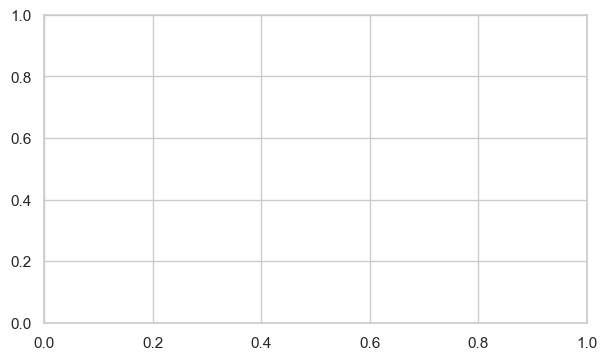

In [28]:
fig, ax = plt.subplots(figsize=(7, 4))

sns.scatterplot(
    # your code here
    ax=ax
)

**Task 4.2 (optional):** Use the package `statsmodels` to perform an ordinary least squares regression of the form  

`NG_score_mean ~ belief_share + truth_share + party + party * belief_share + party * truth_share`.

How does the NewsGuard score chage if the proportion of belief-speaking increases by 10%? How does the score behave if the proportion of truth-seeking increases by 10%?

In [29]:
import statsmodels.formula.api as smf

In [30]:
# your code here

**Task 4.3 (optional):** Use the fitted OLS regression model to make predictions of the NewsGuard score for a range of proportions of belief-speaking from 0% to 30%. Get the 95% confidence intervals for the predictions. Visualize the predictions including their confidence intervals on top of the scatterplot.

**Hint:** Use the function `get_prediction()` of the fitted model to get the predictions. Use the function `summary_frame()` on the predictions to get the confidence intervals.

In [31]:
# your code here